In [4]:
# Start writing code here...
from scholarly import scholarly
import jmespath
from rich.progress import track
import networkx as nx

In [5]:
# basic pattern
base_search = scholarly.search_author('Chris Delcher')
base_author = scholarly.fill(next(base_search))
base_author

{'container_type': 'Author',
 'filled': {'basics', 'coauthors', 'counts', 'indices', 'publications'},
 'source': <AuthorSource.SEARCH_AUTHOR_SNIPPETS: 2>,
 'scholar_id': 'tBRQWoYAAAAJ',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=tBRQWoYAAAAJ',
 'name': 'Chris Delcher, PhD',
 'affiliation': 'University of Kentucky, Institute for Pharmaceutical Outcomes & Policy',
 'email_domain': '@uky.edu',
 'interests': ['Pharmacoepidemiology',
  'substance use',
  'surveillance systems',
  'policy'],
 'citedby': 1031,
 'citedby5y': 951,
 'hindex': 15,
 'hindex5y': 14,
 'i10index': 24,
 'i10index5y': 23,
 'publications': [{'container_type': 'Publication',
   'source': <PublicationSource.AUTHOR_PUBLICATION_ENTRY: 2>,
   'bib': {'title': 'Increases in fentanyl-related overdose deaths—Florida and Ohio, 2013–2015',
    'pub_year': '2016'},
   'filled': False,
   'author_pub_id': 'tBRQWoYAAAAJ:qxL8FJ1GzNcC',
   'num_citations': 164},
  {'container_type': 'Publication',


In [6]:
base_author['publications'][0]['source']

<PublicationSource.AUTHOR_PUBLICATION_ENTRY: 2>

In [7]:
# sample of jmespath search implementation
# shows who delcher wrote papers with (coauthors)
# this is a smaller subset of his total network/influence
# doesnt account people who cited his work
jmespath.search("coauthors[*].name", base_author)

['Mildred Maldonado Molina',
 'Yanning Wang',
 'Alexander C. Wagenaar',
 'Patricia R. Freeman, PhD, RPh, FAPh...',
 'Sanjay Ranka',
 'Jeffery Talbert',
 'svetla slavova',
 'Joshua D. Brown',
 'Robert L Cook',
 'Almut G. Winterstein',
 'Amie Goodin',
 'Magdalena Cerda',
 'Alvaro Castillo-Carniglia',
 'Melvin Livingston',
 'Nathan Pauly',
 'David S. Fink',
 'Tracey E Barnett',
 'Silvia S Martins',
 'Nicholas Perez',
 'Yu-Jung "Jenny" Wei']

## General Pattern

The general pattern is to start with an author search query, then fill the author object, then get a list of coauthor names.

In [8]:
lvl_1_search = scholarly.search_author('Chris Delcher')
lvl_1_author = scholarly.fill(next(lvl_1_search))
lvl_1_coauthors = jmespath.search("coauthors[*].name", lvl_1_author)

In [9]:
connections = set([('Chris Delcher', a) for a in lvl_1_coauthors])  # first depth, starting with Delcher

In [12]:
lvl_2_coauthors = []
for author1 in track(lvl_1_coauthors, total=len(lvl_1_coauthors)):  # second depth
    lvl_2_search = scholarly.search_author(author1)
    try:
        lvl_2_author = scholarly.fill(next(lvl_2_search))
    except StopIteration:
        continue
    coauthors = jmespath.search("coauthors[*].name", lvl_2_author)
    for a1 in coauthors:
        connections.add((a1, author1))
    # level 2
#     for author2 in coauthors:  # third depth
#         search = scholarly.search_author(author2)
#         try:
#             results = scholarly.fill(next(search))
#         except StopIteration:
#             continue
#         co_coauthors = jmespath.search("coauthors[*].name", results)
#         for a2 in co_coauthors:
#             connections.add((a2, author2))

Output()

In [39]:
connections

{('Aaron Shev', 'Alvaro Castillo-Carniglia'),
 ('Aaron Yelowitz', 'Jeffery Talbert'),
 ('Adel Alrwisan', 'Almut G. Winterstein'),
 ('Alex Brito', 'Alvaro Castillo-Carniglia'),
 ('Alex Elswick', 'Amie Goodin'),
 ('Alex Piquero', 'Mildred Maldonado Molina'),
 ('Alexander C. Wagenaar', 'Mildred Maldonado Molina'),
 ('Almut G. Winterstein', 'Amie Goodin'),
 ('Almut G. Winterstein', 'Joshua D. Brown'),
 ('Alvaro Castillo-Carniglia', 'Magdalena Cerda'),
 ('Amanda Fallin-Bennett', 'Amie Goodin'),
 ('Amie Goodin', 'Jeffery Talbert'),
 ('Amie Goodin', 'Joshua D. Brown'),
 ('Anand Shewale', 'Jeffery Talbert'),
 ('Anand Shewale', 'Joshua D. Brown'),
 ('Andrea L. Roberts', 'Magdalena Cerda'),
 ('Andrew Rundle', 'Magdalena Cerda'),
 ('Arch Mainous', 'Jeffery Talbert'),
 ('Ariadne E Rivera-Aguirre', 'Alvaro Castillo-Carniglia'),
 ('Ariadne E Rivera-Aguirre', 'Magdalena Cerda'),
 ('Arslan Munir', 'Sanjay Ranka'),
 ('Babette Brumback', 'Almut G. Winterstein'),
 ('Brad Cannell', 'Mildred Maldonado Moli

In [68]:
G = nx.Graph()
G.add_edges_from(connections)

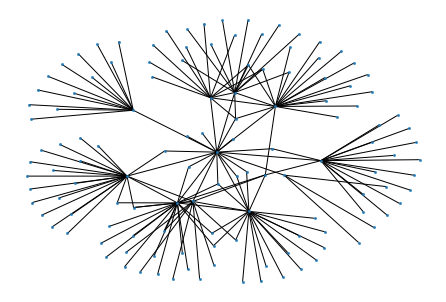

In [69]:
nx.draw_kamada_kawai(G, with_labels=False, node_size=5, linewidths=0.5)

In [70]:
nx.kamada_kawai_layout(G)

{'Melanie Wall': array([0.41053883, 0.86907932]),
 'Magdalena Cerda': array([0.09259183, 0.44515375]),
 'Garen Wintemute': array([0.61653479, 0.74364912]),
 'Alvaro Castillo-Carniglia': array([0.29245734, 0.34480978]),
 'Douglas Steinke': array([ 0.32912766, -0.88722761]),
 'Jeffery Talbert': array([ 0.16257942, -0.41314494]),
 'Laukik Chitnis': array([-0.51465554,  0.66768158]),
 'Sanjay Ranka': array([-0.40524564,  0.31745062]),
 'Maria Scharron-del Rio': array([0.94786384, 0.18579282]),
 'Mildred Maldonado Molina': array([ 0.51549838, -0.04685985]),
 'Michelle Lofwall': array([ 0.53250115, -0.67507027]),
 'Scott Martin Vouri': array([-0.13747447, -0.83089523]),
 'Amie Goodin': array([-0.18859385, -0.35193712]),
 'xi wang': array([-0.48384808, -0.35105146]),
 'Emily Hankosky': array([ 0.24601495, -0.80569748]),
 'Victoria Frye': array([0.3105481 , 0.93325184]),
 'Brandon DL Marshall': array([0.15966895, 0.64423692]),
 'Chris Delcher': array([0.00466848, 0.01473206]),
 'Almut G. Winte

In [72]:
G.nodes()

NodeView(('Melanie Wall', 'Magdalena Cerda', 'Garen Wintemute', 'Alvaro Castillo-Carniglia', 'Douglas Steinke', 'Jeffery Talbert', 'Laukik Chitnis', 'Sanjay Ranka', 'Maria Scharron-del Rio', 'Mildred Maldonado Molina', 'Michelle Lofwall', 'Scott Martin Vouri', 'Amie Goodin', 'xi wang', 'Emily Hankosky', 'Victoria Frye', 'Brandon DL Marshall', 'Chris Delcher', 'Almut G. Winterstein', 'Shigang Chen', 'Ryan P Hickson', 'Sarah R. Lowe', 'David S. Fink', 'Bryan D. Jones', 'Arch Mainous', 'Katherine Keyes', 'Paulina Pino', 'Hannah Laqueur', 'Geoffrey Fox', 'David Cordova', 'Tianshu Feng', 'Aaron Yelowitz', 'Elisa Ansoleaga', 'svetla slavova', 'Prabhat Mishra', 'Daniel Harris', 'Keisa Fallin-Bennett', 'Joseph Delaney', 'Robert L Cook', 'Chris Delcher, PhD', 'Andrea L. Roberts', 'Joshua D. Brown', 'Alex Elswick', 'Alex Piquero', 'Silvia S Martins', 'Arslan Munir', 'Israel Liberzon', 'Wei-Hsuan Lo-Ciganic', 'Melissa Tracy', 'Regina Bussing', 'Yu-Jung "Jenny" Wei', 'Qixuan Chen', 'Richard Segal'

In [61]:
import plotly.graph_objects as go
#G = nx.random_geometric_graph(200, 0.125)

In [138]:
edge_x = []
edge_y = []
positions = nx.kamada_kawai_layout(G)
for edge in G.edges():
    x0, y0 = positions[edge[0]]
    x1, y1 = positions[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_name = []
for node in G.nodes():
    x, y = positions[node]
    node_x.append(x)
    node_y.append(y)
    node_name.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    hovertext=node_name,    
    customdata=node_text,
    hovertemplate='%{hovertext}<br>%{customdata}<extra></extra>',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [139]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f'# of connections: {str(len(adjacencies[1]))}')

node_trace.marker.color = node_adjacencies
#node_text

In [140]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=True,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()